In [ ]:
#create data normal gradient way
from random import Random
seed=5
random_gen=Random(x=seed)
def generate_pnts(N=1000):
    lst_x,lst_y=[],[]
    for _ in range(N):
        lst_x.append(random_gen.uniform(a=0,b=1))
    for _ in range(N):
        lst_y.append(random_gen.uniform(a=0,b=1))
    return lst_x,lst_y



#### Instead of only relying on xp and yp (global variables) I'll pass the random batches

In [17]:
#create data Stocastic gradient way
from random import Random
from math import ceil, sqrt
SEED = 5
def generate_pnts(N=1000):
    random_gen = Random(x=seed)
    lst_x,lst_y=[],[]
    for _ in range(N):
        lst_x.append(random_gen.uniform(a=0,b=1))
    for _ in range(N):
        lst_y.append(random_gen.uniform(a=0,b=1))
    return lst_x,lst_y

def calc_grad(x_p, y_p, batch_x, batch_y):
    sum_x, sum_y = 0, 0
    for x_i, y_i in zip(batch_x, batch_y):
        inv_sqrt = ((x_i - x_p) ** 2 + (y_i - y_p) ** 2) ** -0.5
        sum_x += inv_sqrt * (x_i - x_p)
        sum_y += inv_sqrt * (y_i - y_p)
    return -sum_x / len(batch_x), -sum_y / len(batch_y)

def loss(x_p,y_p,batch_x,batch_y):
    return(1/len(batch_x))*sum([sqrt((x_i-x_p)**2+(y_i-y_p)**2) for x_i,y_i in zip(batch_x,batch_y)])

data_x,data_y=generate_pnts()

Sampler = Random(x = SEED)
x_p_sgd, y_p_sgd = 0.3, 0.3
x_p_gd, y_p_gd = 0.3, 0.3

losses_sgd,losses_gd= [],[]

EPOCHS=100 
BATCH_SZ=4
indices= [i for i in range (len(data_x))]
N = len(data_x)
num_Batches = ceil (N / BATCH_SZ)
DELTA = 1e-2

for _ in range(EPOCHS):
    Sampler.shuffle(indices)
    ##  SGD
    for batch_ind in range (num_Batches):
        #check which indices contribute in data
        batch_indices=indices[batch_ind * BATCH_SZ: (batch_ind + 1) * BATCH_SZ]
        batch_x = [data_x[i] for i in batch_indices]
        batch_y = [data_y[i] for i in batch_indices]
        #cal gradient
        grad_x_sgd, grad_y_sgd = calc_grad(x_p_sgd, y_p_sgd, batch_x, batch_y)
        x_p_sgd -= DELTA * grad_x_sgd
        y_p_sgd -= DELTA * grad_y_sgd
        #to check convergance
        losses_sgd.append(loss(x_p_sgd,y_p_sgd,data_x,data_y))

##  GD
    grad_x_gd, grad_y_gd = calc_grad(x_p_gd, y_p_gd, data_x, data_y)
    x_p_gd -= DELTA * grad_x_gd
    y_p_gd -= DELTA * grad_y_gd
    losses_gd.append(loss(x_p_gd,y_p_gd,data_x,data_y))      


##### **epochs** is the num of times to iterate/visit the WHOLE dataset, and **Batch**size is the num of points contributing to gradient estimate in one update

##### To make sure i visited the whole dataset, I shuffle the indexs of our data

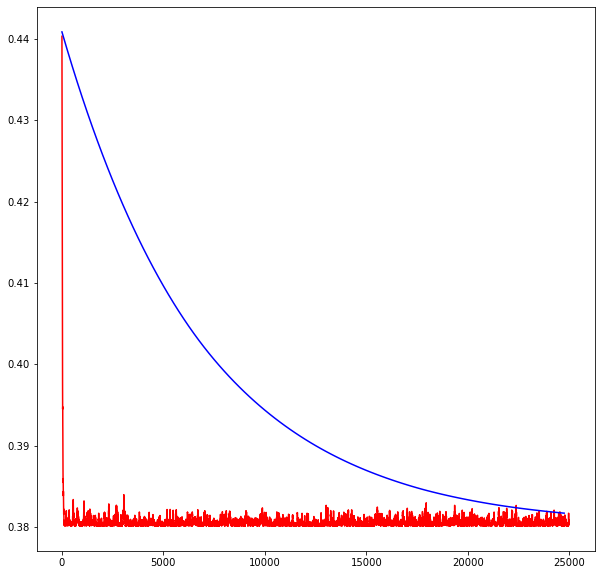

In [18]:
from matplotlib.pyplot import figure
fig = figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.plot (losses_sgd , "r")
ax.plot ([i*num_Batches for i in range (len(losses_gd))],losses_gd , "b")


*Stochastic is way faster hence the quick convergance of red graph*

(0.38, 0.39)

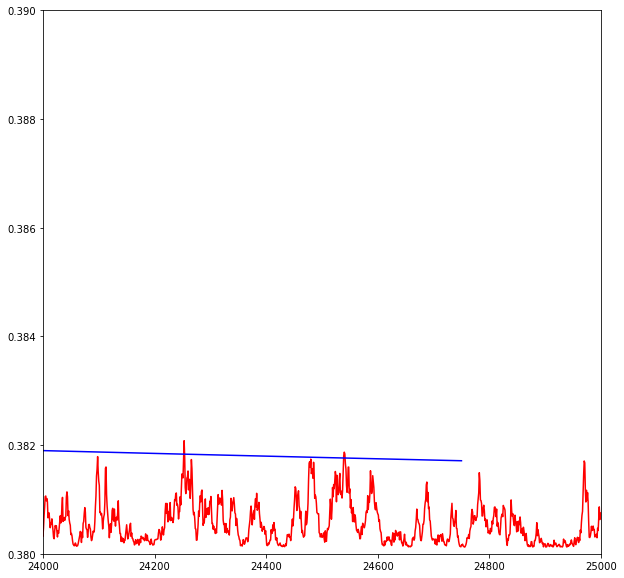

In [22]:
from matplotlib.pyplot import figure
fig = figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.plot (losses_sgd , "r")
ax.plot ([i*num_Batches for i in range (len(losses_gd))],losses_gd , "b")
ax.set_xlim(24000, 25000)
ax.set_ylim(0.38, 0.39)

but a closer look shows how noisy the stochastic gradient is

if i changed delta value then its like i'm sure of my steps

In [25]:
from random import Random
from math import ceil, sqrt
SEED = 5
def generate_pnts(N=1000):
    random_gen = Random(x=seed)
    lst_x,lst_y=[],[]
    for _ in range(N):
        lst_x.append(random_gen.uniform(a=0,b=1))
    for _ in range(N):
        lst_y.append(random_gen.uniform(a=0,b=1))
    return lst_x,lst_y

def calc_grad(x_p, y_p, batch_x, batch_y):
    sum_x, sum_y = 0, 0
    for x_i, y_i in zip(batch_x, batch_y):
        inv_sqrt = ((x_i - x_p) ** 2 + (y_i - y_p) ** 2) ** -0.5
        sum_x += inv_sqrt * (x_i - x_p)
        sum_y += inv_sqrt * (y_i - y_p)
    return -sum_x / len(batch_x), -sum_y / len(batch_y)

def loss(x_p,y_p,batch_x,batch_y):
    return(1/len(batch_x))*sum([sqrt((x_i-x_p)**2+(y_i-y_p)**2) for x_i,y_i in zip(batch_x,batch_y)])

data_x,data_y=generate_pnts()

Sampler = Random(x = SEED)
x_p_sgd, y_p_sgd = 0.3, 0.3
x_p_gd, y_p_gd = 0.3, 0.3

losses_sgd,losses_gd= [],[]

EPOCHS=100 
BATCH_SZ=4
indices= [i for i in range (len(data_x))]
N = len(data_x)
num_Batches = ceil (N / BATCH_SZ)
DELTA = 1e-1

for _ in range(EPOCHS):
    Sampler.shuffle(indices)
    ##  SGD
    for batch_ind in range (num_Batches):
        #check which indices contribute in data
        batch_indices=indices[batch_ind * BATCH_SZ: (batch_ind + 1) * BATCH_SZ]
        batch_x = [data_x[i] for i in batch_indices]
        batch_y = [data_y[i] for i in batch_indices]
        #cal gradient
        grad_x_sgd, grad_y_sgd = calc_grad(x_p_sgd, y_p_sgd, batch_x, batch_y)
        x_p_sgd -= DELTA * grad_x_sgd
        y_p_sgd -= DELTA * grad_y_sgd
        #to check convergance
        losses_sgd.append(loss(x_p_sgd,y_p_sgd,data_x,data_y))

##  GD
    grad_x_gd, grad_y_gd = calc_grad(x_p_gd, y_p_gd, data_x, data_y)
    x_p_gd -= DELTA * grad_x_gd
    y_p_gd -= DELTA * grad_y_gd
    losses_gd.append(loss(x_p_gd,y_p_gd,data_x,data_y))      


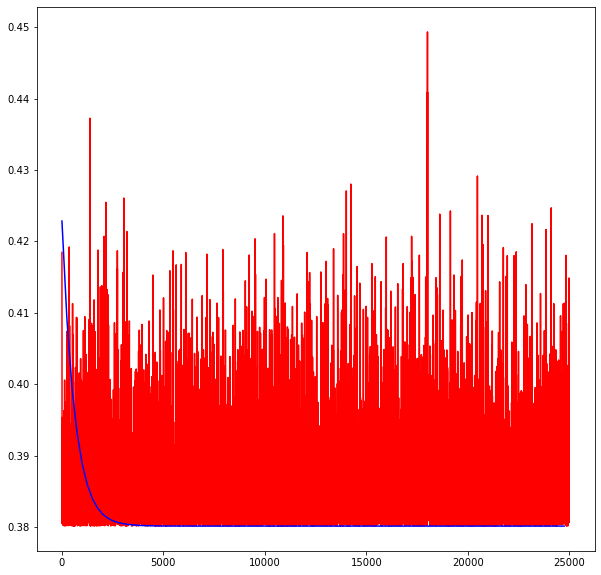

In [26]:
from matplotlib.pyplot import figure
fig = figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.plot (losses_sgd , "r")
ax.plot ([i*num_Batches for i in range (len(losses_gd))],losses_gd , "b")


maybe if we increased the batch size it will be better

In [27]:
from random import Random
from math import ceil, sqrt
SEED = 5
def generate_pnts(N=1000):
    random_gen = Random(x=seed)
    lst_x,lst_y=[],[]
    for _ in range(N):
        lst_x.append(random_gen.uniform(a=0,b=1))
    for _ in range(N):
        lst_y.append(random_gen.uniform(a=0,b=1))
    return lst_x,lst_y

def calc_grad(x_p, y_p, batch_x, batch_y):
    sum_x, sum_y = 0, 0
    for x_i, y_i in zip(batch_x, batch_y):
        inv_sqrt = ((x_i - x_p) ** 2 + (y_i - y_p) ** 2) ** -0.5
        sum_x += inv_sqrt * (x_i - x_p)
        sum_y += inv_sqrt * (y_i - y_p)
    return -sum_x / len(batch_x), -sum_y / len(batch_y)

def loss(x_p,y_p,batch_x,batch_y):
    return(1/len(batch_x))*sum([sqrt((x_i-x_p)**2+(y_i-y_p)**2) for x_i,y_i in zip(batch_x,batch_y)])

data_x,data_y=generate_pnts()

Sampler = Random(x = SEED)
x_p_sgd, y_p_sgd = 0.3, 0.3
x_p_gd, y_p_gd = 0.3, 0.3

losses_sgd,losses_gd= [],[]

EPOCHS=100 
BATCH_SZ=12
indices= [i for i in range (len(data_x))]
N = len(data_x)
num_Batches = ceil (N / BATCH_SZ)
DELTA = 1e-1

for _ in range(EPOCHS):
    Sampler.shuffle(indices)
    ##  SGD
    for batch_ind in range (num_Batches):
        #check which indices contribute in data
        batch_indices=indices[batch_ind * BATCH_SZ: (batch_ind + 1) * BATCH_SZ]
        batch_x = [data_x[i] for i in batch_indices]
        batch_y = [data_y[i] for i in batch_indices]
        #cal gradient
        grad_x_sgd, grad_y_sgd = calc_grad(x_p_sgd, y_p_sgd, batch_x, batch_y)
        x_p_sgd -= DELTA * grad_x_sgd
        y_p_sgd -= DELTA * grad_y_sgd
        #to check convergance
        losses_sgd.append(loss(x_p_sgd,y_p_sgd,data_x,data_y))

##  GD
    grad_x_gd, grad_y_gd = calc_grad(x_p_gd, y_p_gd, data_x, data_y)
    x_p_gd -= DELTA * grad_x_gd
    y_p_gd -= DELTA * grad_y_gd
    losses_gd.append(loss(x_p_gd,y_p_gd,data_x,data_y))      


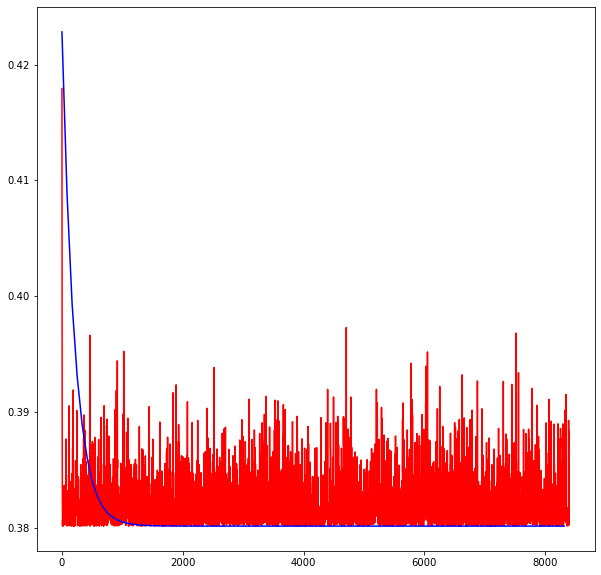

In [28]:
from matplotlib.pyplot import figure
fig = figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.plot (losses_sgd , "r")
ax.plot ([i*num_Batches for i in range (len(losses_gd))],losses_gd , "b")


A noisy estimator of the gradient from SGD

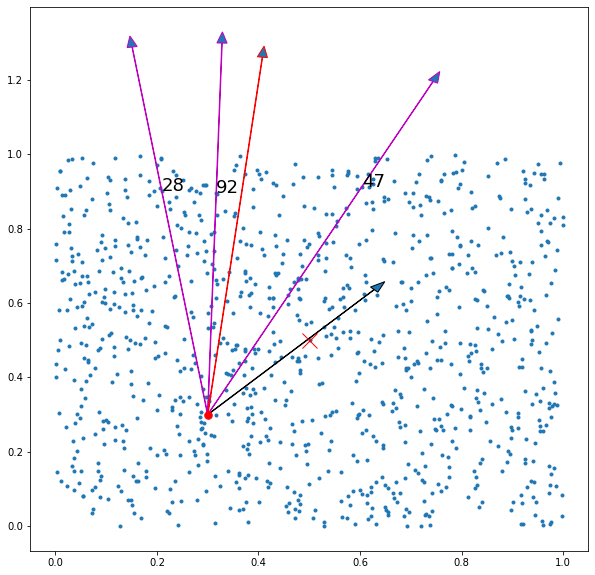

In [49]:
fig = figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
ax.scatter(x=data_x, y=data_y, marker=".")
y_p,x_p=.3, .3
ax.plot(x_p, y_p, "r.", markersize=15)

ax.plot(.5, .5, "rx", markersize=15)
grad_x, grad_y = calc_grad(x_p, y_p, data_x, data_y)

ax.arrow(x_p, y_p, -grad_x, - grad_y, head_width = .02)
#  neg grad to go aganist the gradiet and see
# it converge

batch_indices =[28,92,47]
# plotting for each point
for i in batch_indices:
    ax.text(data_x[i],data_y[i], str(i), fontsize =18)
    # calc gradient contributed for  each point of them
    grad_x_pnt , grad_y_pnt  = calc_grad(x_p, y_p, [data_x[i]],[data_y[i]])
    ax.arrow(x_p, y_p, - grad_x_pnt, - grad_y_pnt, head_width = .02, edgecolor ="m")
   
    # calc gradient contributed for  each batch
grad_x_sgd, grad_y_sgd = calc_grad(x_p, y_p, [data_x[i] for i in batch_indices],[data_y[i] for i in batch_indices] )
ax.arrow(x_p, y_p, - grad_x_sgd, - grad_y_sgd, head_width = .02, edgecolor ="r")


the stochastic noise in gradient estimate could be visual represented as the angel between directionality to gradient decent (x = solution) and gradient decent solu = red